In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Master/mlgs/project1A'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
[Errno 2] No such file or directory: 'drive/My Drive/Master/mlgs/project1A'
/content


In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
import scipy.special as sc
from scipy.optimize import fsolve

In [3]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [ ]:
r

0.38490017945975047

In [8]:

# Experiment 1:
# random numbers from uniform distribution
# Generate 10000 numbers from 0 to 1 (run actuion 10000 times)
np.random.seed(5)
n = 1000000
a = 1
b = 20
u = (a+b)/2
sigma = np.sqrt((b-a)**2/12)

#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/u

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])

# np.isclose(F(x), [ 0.0])


data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
#p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)
 
#opt = b**2/(4*(b-a)) #opt should also be in the experiment, one is average and another sum of it. 
opt = auction_exp(data_uniform,b/2)
exp_revenue = auction_exp(data_uniform,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Uniform distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_uniform:")
print(b**2/(4*(b-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b-a))))

worst case robust DAPX = [2.78747538]
Uniform distribution DAPX = [1.14852885]
Theoritically the DAPX_uniform:
[1.14912971]


In [5]:
b_a
r
#(1/np.sqrt(3) - 2/(1+b_a))
u = (a+b_a)/2
np.sqrt((b_a-a)**2/12)/u
u
def f_spe(x):
  return ((x/(x-1)-1)**3)/((2*(x/(x-1))-1)**2) - (1/np.sqrt(3) - 2/(np.sqrt(3)*(1+x)))**2 

b_a = fsolve(f_spe, [5])
#the result is the ratio of b over a
b_a
print(opt)
print(exp_revenue)

NameError: ignored

worst case robust DAPX = [1.96491512]
Uniform distribution DAPX = [1.02077945]
Theoritically the DAPX_uniform:
[1.02009952]


In [13]:
sigma_list = []
DAPX_uniform = []
r_list =[]
reserve_p_list = []
p_d_list = []
step = np.arange(0, 4, 0.05)
for i in step:
  b = 20 - i
  a = 22 -b
  u = (a+b)/2
  data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
  sigma = np.sqrt((b-a)**2/12)
  r = sigma/u
  r_list.append(r)
  sigma_list.append(sigma)
  #p_d = 1 + 4* (sigma/u)**2
  p_d = fsolve(F, [u])
  p_d_list.append(p_d)
  reserve_p = p_d*u/(2*p_d-1)
  reserve_p_list.append(reserve_p)
  opt = auction_exp(data_uniform,b/2)
  #opt = b**2/(4*(b-a))
  exp_revenue = auction_exp(data_uniform,reserve_p)

  DAPX_uniform.append((opt/exp_revenue)[0])  

In [15]:
b

16.05

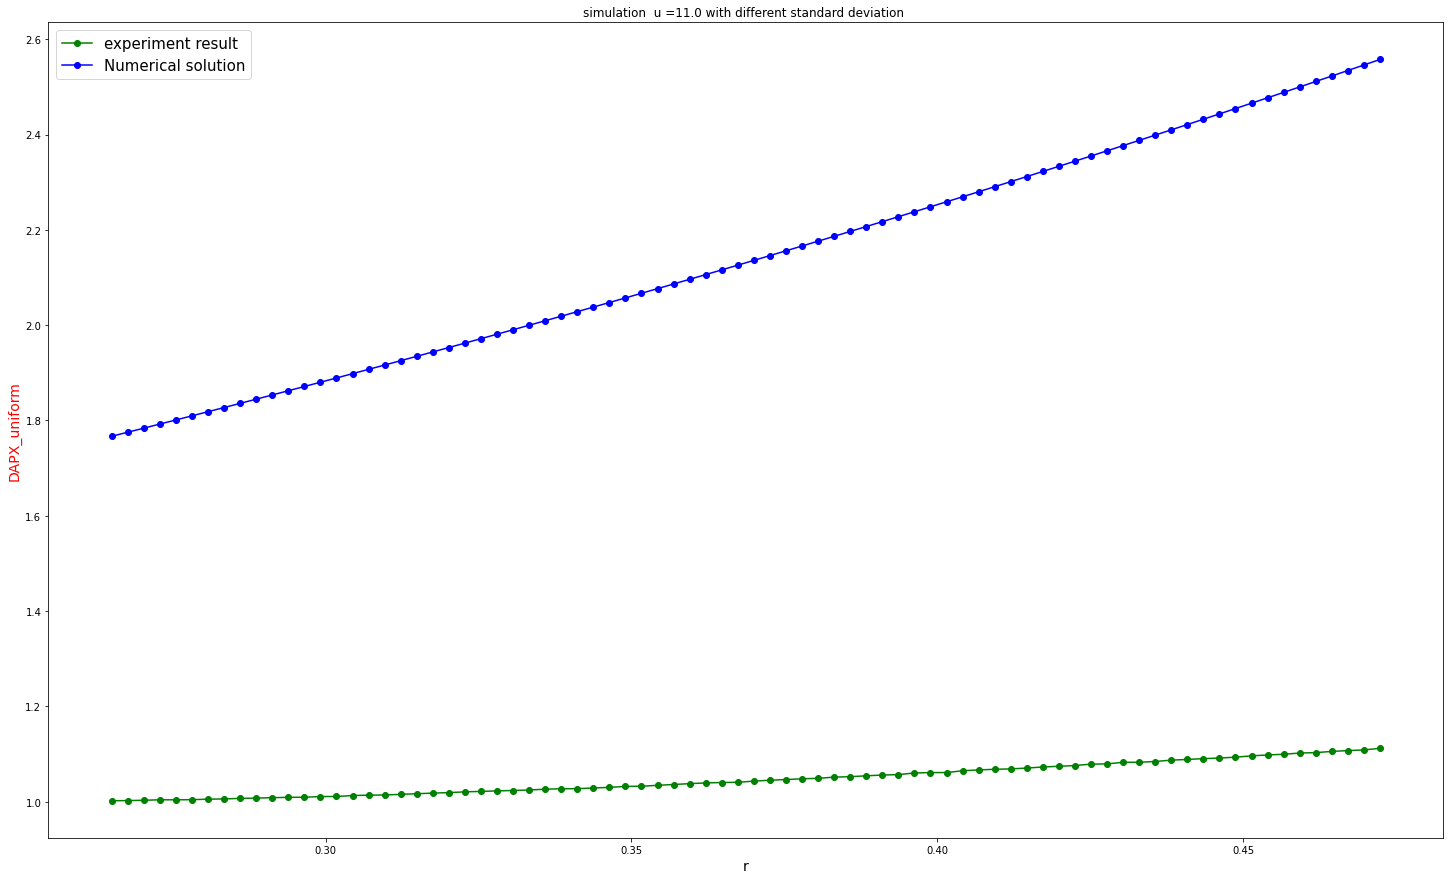

In [25]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(25, 15))
# make a plot
#ax.bar(r_list, DAPX_uniform, width = 0.005)
ax.plot(r_list, DAPX_uniform,color="green",marker="o",label="experiment result")
# set x-axis label
ax.set_xlabel("r",fontsize=14)
# set y-axis label
ax.set_ylabel("DAPX_uniform",color="red",fontsize=14)
#ax.set_ylim(0.7,1.2)
#ax.axhline(1,color="red")
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax.plot(r_list, p_d_list,color="blue",marker="o",label="Numerical solution")
#ax2.set_ylabel("p_d",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')
plt.legend(loc="upper left",fontsize = 15)

plt.show()


In [70]:
#This is used to find a type of uniform distribution that can reach the optimal revenue
def f_spe(x):
  return ((x/(x-1)-1)**3)/((2*(x/(x-1))-1)**2) - (1/np.sqrt(3) - 2/(np.sqrt(3)*(1+x)))**2 

b_a = fsolve(f_spe, [5])
#the result is the ratio of b over a
b_a

n = 1000000
#wlog we can simply set a = 1 and b = b_a
a = 1
data_uniform = uniform.rvs(loc=a, scale=b_a-a,size=n)
u = (a+b_a)/2
sigma = np.sqrt((b_a-a)**2/12)

#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/u

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])
print(p_d)
reserve_p = p_d*u/(2*p_d-1)
print(reserve_p)
print(b_a/2)
opt = auction_exp(data_uniform,b_a /2)
exp_revenue = auction_exp(data_uniform,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Uniform distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_uniform:")
print(b_a**2/(4*(b_a-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b_a-a))))

[1.69336127]
[1.22112479]
[1.22112479]
worst case robust DAPX = [1.69336127]
Uniform distribution DAPX = [1.]
Theoritically the DAPX_uniform:
[1.]


In [ ]:
sigma_list1 = []
DAPX_uniform1 = []
r_list1 =[]
reserve_p_list1 = []
p_d_list1 =[]
n=100000

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   

for i in np.arange(100):
  b = uniform.rvs(loc=0, scale=10)
  a = uniform.rvs(loc=0, scale=10)
  u = (a+b)/2
  sigma = np.sqrt((b-a)**2/12)
  #not super accurate, but due to the character of cdf and pde maybe also factorial
  #r_list.append(sigma/u)
  r = sigma/u
  data_uniform = uniform.rvs(loc=min(a,b), scale=abs(b-a),size=n)
  p_d = fsolve(F, [u])
  reserve_p = p_d*u/(2*p_d-1)

  opt = auction_exp(data_uniform,max(a,b)/2)
  #opt = b**2/(4*(b-a))
  exp_revenue = auction_exp(data_uniform,reserve_p)
  ratio = (opt/exp_revenue)[0]
  #DAPX_uniform.append(ratio) 
  if ratio <= 1:
    DAPX_uniform1.append(ratio)
    r_list1.append(r) 
    reserve_p_list1.append(reserve_p)
    p_d_list1.append(p_d)

   



In [ ]:
p_d_list

[array([1.27839556]),
 array([1.03879385]),
 array([1.40184561]),
 array([1.1243649]),
 array([1.35292873])]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


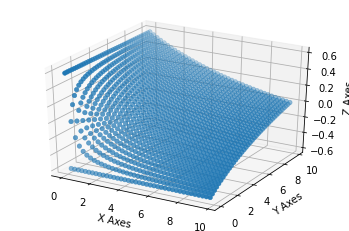

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d  


fig = plt.figure()
ax = plt.axes(projection="3d")

a = np.arange(0, 10, 0.25)
b = np.arange(0, 10, 0.25)
a, b = np.meshgrid(a, b)
r = (b-a)/(np.sqrt(3)*(b+a))

#ax.plot_surface(a,b,r)
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Z Axes')

ax.scatter(a, b, r, cmap='viridis', linewidth=0.5)

plt.show()

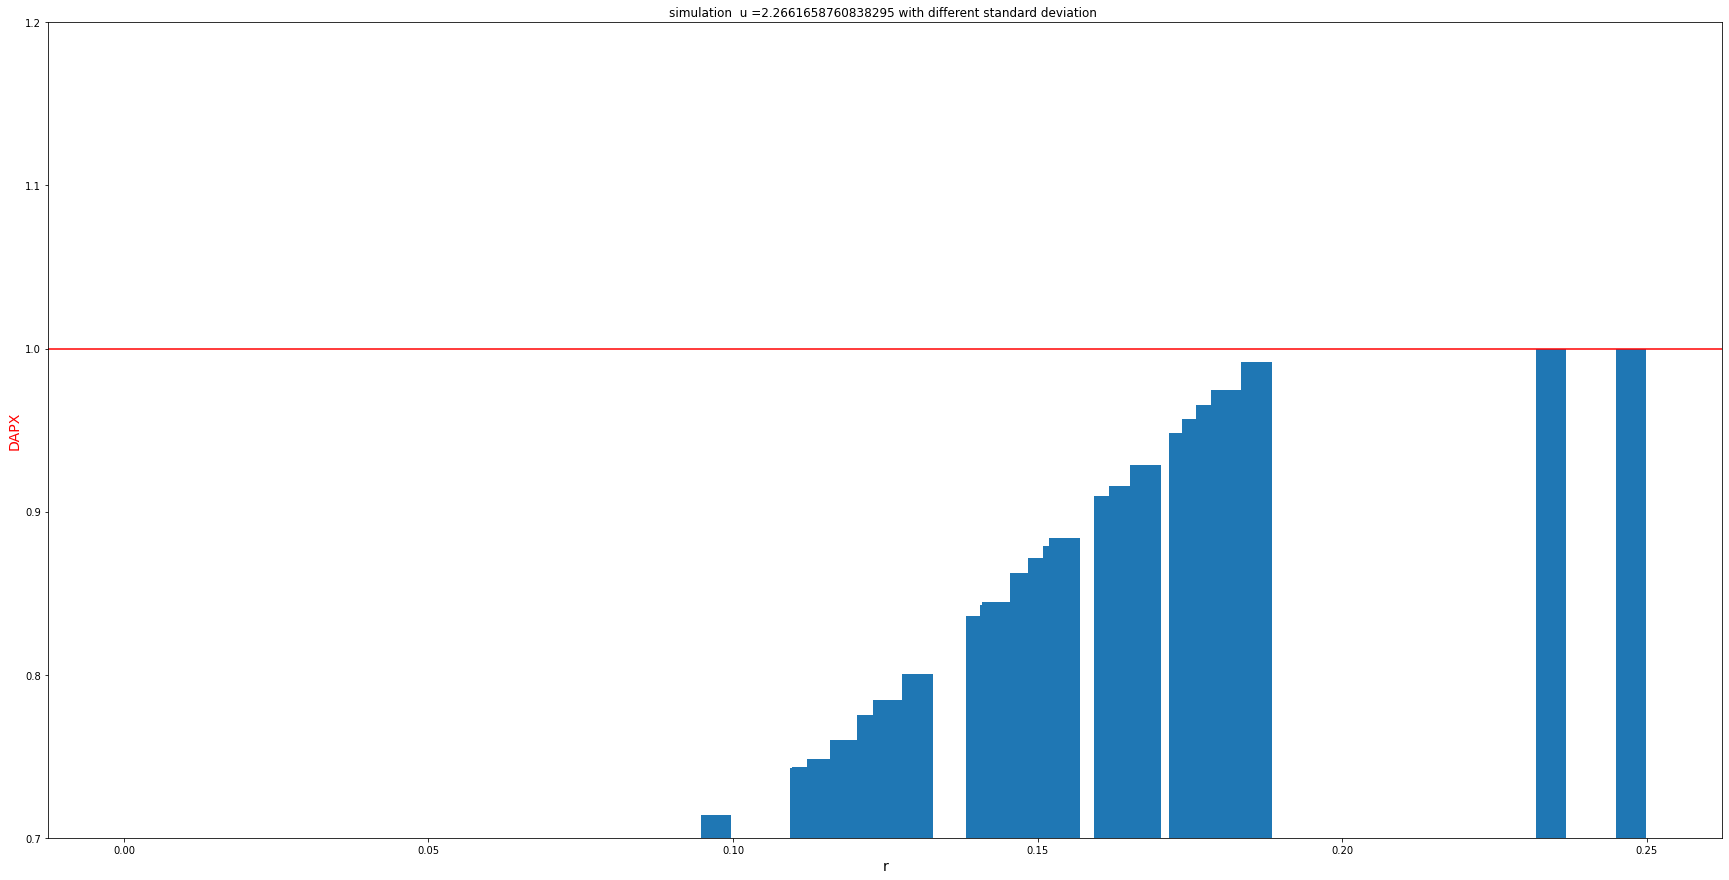

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(30, 15))
# make a plot
ax.bar(r_list1, DAPX_uniform1, width = 0.005)

# set x-axis label
ax.set_xlabel("r",fontsize=14)
# set y-axis label
ax.set_ylabel("DAPX",color="red",fontsize=14)
ax.set_ylim(0.7,1.2)
ax.axhline(1,color="red")
# twin object for two different y-axis on the sample plot
#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot(sigma_list, diff,color="blue",marker="o")
#ax2.set_ylabel("difference",color="blue",fontsize=14)
#ax2.axhline(0,color="red")
plt.title('simulation'+ '  u =' +str(u)+' with different standard deviation ')

plt.show()

In [ ]:
# Experiment 2:
# This time, we use two mass point distribution, wlog, set x = 1, and y = 2, x with probably 1-a, and y with probability a
n = 1000
x=1
y=2
DAPX = 0
reserve_p = np.arange(1, 2.01, 0.01)
a = np.arange(0, 1, 0.1)
exp_revenue_list = []
for i in a:
  data_bin = binom.rvs(1, i, size = n) + 1
  exp_revenue = []
  for p in reserve_p: 
    exp_revenue.append(auction_exp(data_bin,p))

  exp_revenue_list.append(exp_revenue)
  mean = y*i + x*(1-i)
  DAPX = 1 + 4*((i*np.power(y,2) + (1-i)*np.power(x,2))/(i*np.power(mean,2)) - 1)
  plt.title('when probility a =' + str(1-i) +' u ='+str(mean)+' DAPX ='+str(DAPX))
  plt.bar(reserve_p,exp_revenue, width=0.005)
  plt.show()



In [ ]:
# Experiment 3:
# This time, we use exponential distribution, wlog, set lambda = 1
from scipy.stats import expon

#scale = 1/lambda
lambda1 = 1
n = 1000000
data_expon = expon.rvs(size=n,scale = 1/lambda1)



u = 1/lambda1
sigma = 1/lambda1


#not super accurate, but due to the character of cdf and pde maybe also factorial
r = sigma/u

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            


p_d = fsolve(F, [u])
#p_d = 1 + 4* (sigma/u)**2 #solve p the equation in definition 1
reserve_p = p_d*u/(2*p_d-1)


p_opt = 1/lambda1

opt = 1/(lambda1*np.exp(1))
exp_revenue = auction_exp(data_expon,reserve_p)
opt_revenue = auction_exp(data_expon,p_opt)
DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Exponential distribution DAPX = ' + str(DAPX))






worst case robust DAPX = [5.86453651]
Exponential distribution DAPX = [1.16187989]


In [ ]:
reserve_p


array([0.54660235])

In [ ]:
lambda_list = np.arange(0.5, 1.4, 0.1)
DAPX_exp = []
diff = []

for i in lambda_list: 
  data_expon = expon.rvs(size=n,scale = 1/i)
  u = 1/i
  sigma = 1/(i**2)
  p_d = 1 + 4* (sigma/u)**2
  reserve_p = p_d*u/(2*p_d-1)
 
  opt = 1/(i*np.exp(1))
  exp_revenue = auction_exp(data_expon,reserve_p)

  DAPX_exp.append(opt/exp_revenue)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


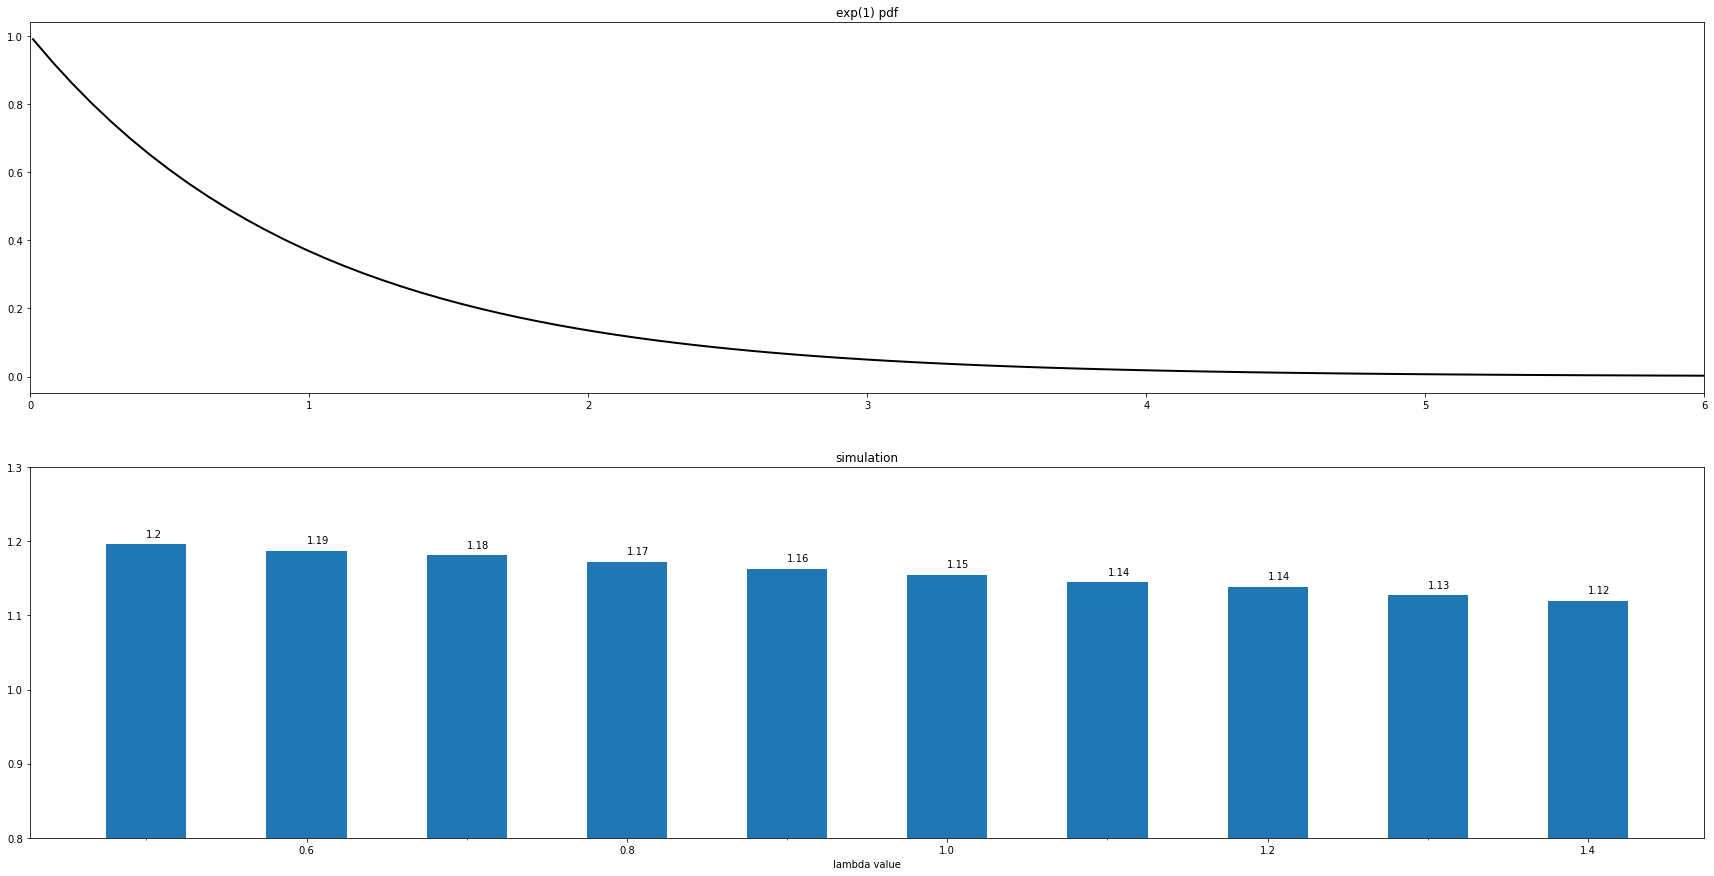

In [ ]:
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.999), 100)
fig, (ax1, ax2)  = plt.subplots(2, 1,figsize=(30, 15))

rv = expon()
ax1.set_title('exp(1) pdf')
ax1.set_xlim(0,6)
ax1.plot(x, rv.pdf(x), 'k-', lw=2)
ax2.set_title('simulation')
ax2.set_ylim(0.8,1.3)
ax2.bar(lambda_list,DAPX_exp, width=0.05)

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in lambda_list]
xlabs=[i for i in lambda_list]
ax2.set_xlabel('lambda value')
ax2.set_xticks(xlocs, xlabs)

for i, v in enumerate(DAPX_exp):
    plt.text(xlocs[i], v + 0.01, str(round(v,2)))

In [ ]:
# Experiment 4:
# This time, we use poisson distribution
from scipy.stats import poisson
import scipy.optimize
import scipy.special as sc
n=100000
mu = 2
data_poi = poisson.rvs(mu,size=n)


u = mu
sigma = mu

p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)


#not super accurate, but due to the character of cdf and pde maybe also factorial
def F(x):
   return x-((1-sc.pdtr(x, mu))/((mu**x)*np.exp(-mu)/sc.factorial(x)))
x = fsolve(F, mu-0.5)

opt = x*(1-sc.pdtr(x, mu))
exp_revenue = auction_exp(data_poi,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Exponential distribution DAPX = ' + str(DAPX))



worst case robust DAPX = 5.0
Exponential distribution DAPX = [1.81566232]


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
reserve_p = np.arange(0, 8, 0.05)
exp_revenue = []
for p in reserve_p: 

  exp_revenue.append(auction_exp(data_poi,p))

In [ ]:
import scipy.special as sc
#not super accurate, but due to the character of cdf and pde maybe also factorial
def F(x):
   return x-((1-sc.pdtr(x, 2))/((2**x)*np.exp(-2)/sc.factorial(x)))
import scipy.optimize
from scipy.optimize import fsolve
x = fsolve(F, 2.1)
x

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([1.99997422])

In [ ]:
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return -x*(1-sc.pdtr(x, 2))

x0 = 1.9
res = minimize(rosen, x0, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: -1.187988
         Iterations: 35
         Function evaluations: 70


array([1.99999999])

In [ ]:
x = 1.9999999
x*(1-sc.pdtr(x, 2))
mu =2
u = mu
sigma = mu

p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)
reserve_p

1.1111111111111112

In [ ]:

fig, (ax1, ax2)  = plt.subplots(2, 1,figsize=(30, 15))
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.999999, mu))


ax1.set_title('poi(1) pdf with 0.99999')

ax1.plot(x, poisson.pmf(x, mu), 'bo', ms=8)
ax1.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

ax2.set_title('simulation'+ '  max rev =' +str(max(exp_revenue))+' with p = '+str(reserve_p[inx]))
ax2.bar(reserve_p,exp_revenue, width=0.02)

In [ ]:
# Experiment 5:
# This time, we use truncated normal distribution
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
n=100000
u = 3
sigma = 1
data = norm.rvs(loc = u,scale = sigma,size=n)
#remove the negative samples
data_norm = [item for item in data if item >= 0]
k = 1/(1-norm.cdf(0, loc = u,scale = sigma))

#not super accurate, but due to the character of cdf and pde maybe also factorial
def F(x):
   return x-((1-k*(norm.cdf(x, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(k*norm.pdf(x, loc = u,scale = sigma)))

p_opt = fsolve(F, u)

r = sigma/u
def f(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            
p_d = fsolve(f, [u])
reserve_p = p_d*u/(2*p_d-1)
opt = auction_exp(data_norm,p_opt)
exp_revenue = auction_exp(data_norm,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Normal distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_uniform:")
print(p_opt*(1-(norm.cdf(p_opt, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))/(reserve_p*(1-(norm.cdf(reserve_p, loc = u,scale = sigma)-norm.cdf(0, loc = u,scale = sigma)))))

worst case robust DAPX = [2.]
Normal distribution DAPX = [1.03602015]
Theoritically the DAPX_uniform:
[1.03675654]


In [ ]:
p_opt

array([2.33520722])

In [ ]:
def f(x):
   return ((x-1)**3)/((2*x-1)**2) - 1/9   
            
p_d = fsolve(f, [4])
p_d

array([2.])

In [ ]:
k = 1/(1-norm.cdf(0,loc = u,scale = sigma))
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return -x*(1-k*norm.cdf(x, loc = u,scale = sigma))

x0 = 0.5
res = minimize(rosen, x0, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})
res.x


Optimization terminated successfully.
         Current function value: -1.743388
         Iterations: 33
         Function evaluations: 67


array([2.33401904])

In [ ]:
import scipy.special as sc
#not super accurate, but due to the character of cdf and pde maybe also factorial
def F(x):
   return x-((1-k*norm.cdf(x, loc = u,scale = sigma))/(k*norm.pdf(x, loc = u,scale = sigma)))
import scipy.optimize
from scipy.optimize import fsolve
x = fsolve(F, 0.5)
x
np.isclose(F(x), [ 0.0])

array([ True])

<BarContainer object of 160 artists>

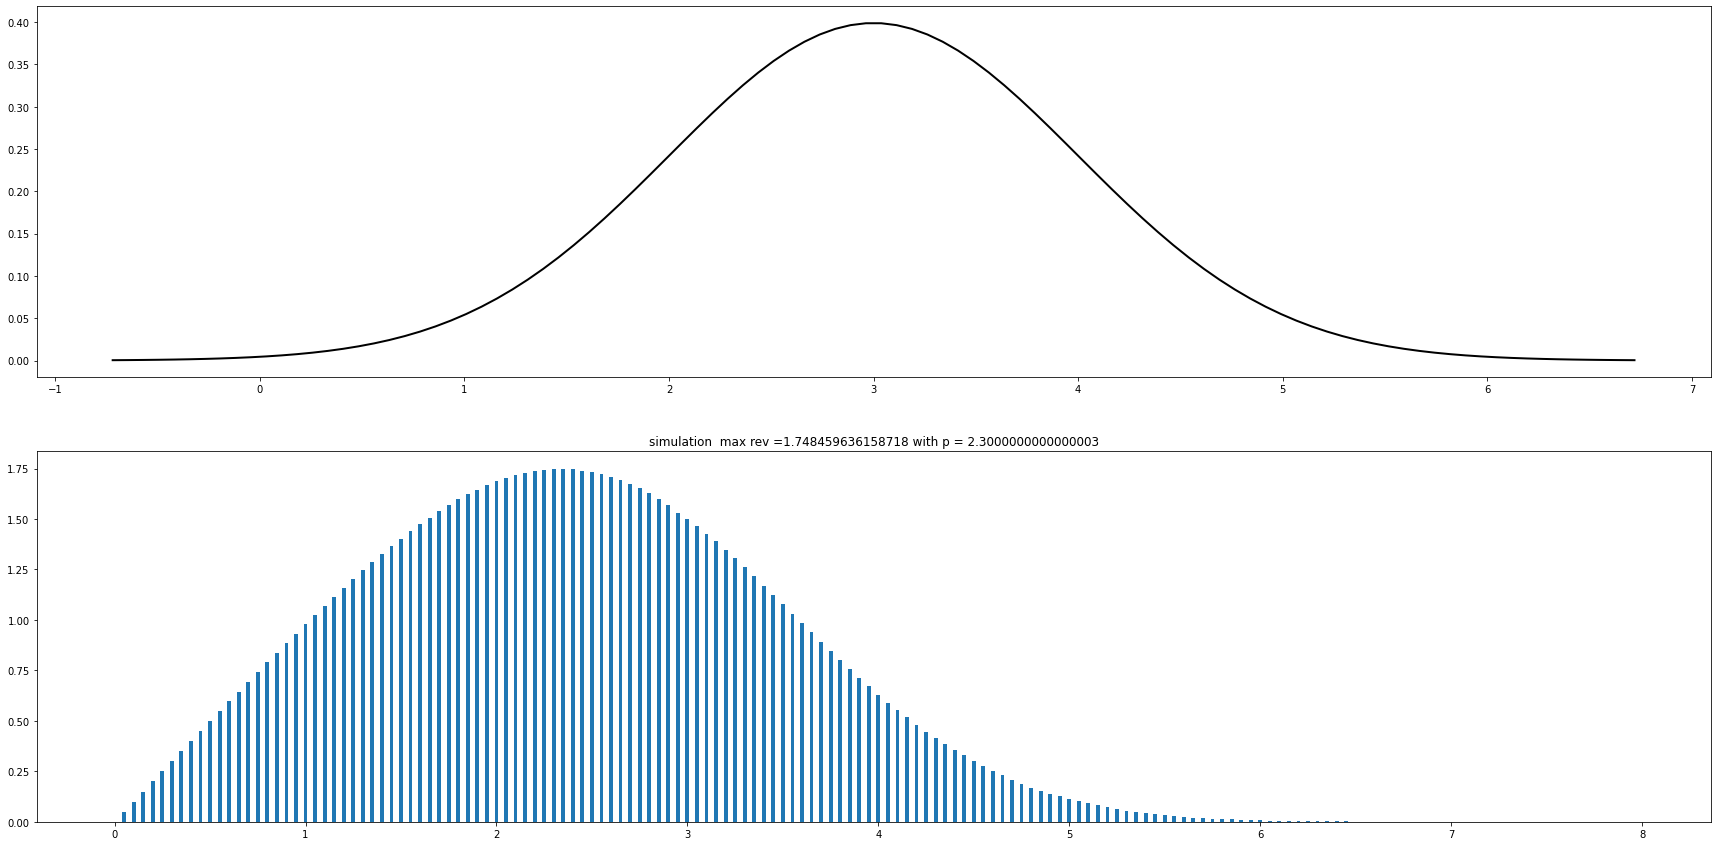

In [ ]:
fig, (ax1, ax2)  = plt.subplots(2, 1,figsize=(30, 15))

inx = np.argmax(exp_revenue)
x = np.linspace(norm(loc = u,scale = sigma).ppf(0.0001),
                norm(loc = u,scale = sigma).ppf(0.9999), 100)
rv = norm(loc = u,scale = sigma)
ax1.plot(x, rv.pdf(x), 'k-', lw=2, label='pdf')
ax2.set_title('simulation' + '  max rev =' +str(max(exp_revenue))+' with p = '+str(reserve_p[inx]))
ax2.bar(reserve_p,exp_revenue, width=0.02)

In [ ]:
import scipy.special as sc
from scipy.optimize import fsolve
#not super accurate, but due to the character of cdf and pde maybe also factorial
u = 3
sigma = 1
def F(x):
   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


root = fsolve(F, [1.8,4])
root
# np.isclose(F(x), [ 0.0])

array([1.49414051, 4.09347574])

In [ ]:
np.isclose(F(x), [1.49414051, 4.09347574])
x= [1.49414051, 4.09347574]
x[0] * (1 + np.log(x[1]/x[0])) - u
x[0] *(2*x[1]-x[0]) - u**2 - sigma**2

-3.950606952685121e-09

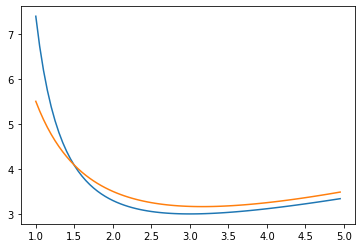

In [ ]:
x = np.arange(1, 5, 0.05)
u = 3
y = np.exp(u/x-1)*x
y1 = ((u**2 + sigma**2)/x +x)*0.5
plt.plot(x,y)
plt.plot(x,y1)
plt.show()

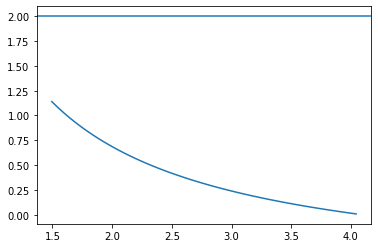

In [ ]:
pi2 = root[1]
pi1 = root[0]

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
x = np.arange(pi1, pi2, 0.05)
y = (pi2/x-1)/don
plt.axhline(np.ceil((pi2/pi1-1)/don))
plt.plot(x,y)
plt.show()

In [ ]:

N = 10000
n = 0
A = np.ceil((pi2/pi1-1)/don)
rej_sample =[]
while(n <= N):
  x = uniform.rvs(loc=pi1, scale=pi2-pi1)
  a = (pi2/x-1)/don/(A/(pi2- pi1))
  u1 = uniform.rvs()
  if (u1 <= a):
    rej_sample.append(x)
    n += 1



(array([7103., 7252., 7191., 7236., 7067., 6743., 6113., 5650., 4983.,
        4666., 4268., 3910., 3548., 3320., 2906., 2690., 2331., 2108.,
        1928., 1648., 1518., 1270., 1124.,  941.,  768.,  648.,  463.,
         337.,  197.,   74.]),
 array([1.00003932, 1.0666106 , 1.13318188, 1.19975316, 1.26632444,
        1.33289573, 1.39946701, 1.46603829, 1.53260957, 1.59918085,
        1.66575213, 1.73232342, 1.7988947 , 1.86546598, 1.93203726,
        1.99860854, 2.06517982, 2.13175111, 2.19832239, 2.26489367,
        2.33146495, 2.39803623, 2.46460751, 2.5311788 , 2.59775008,
        2.66432136, 2.73089264, 2.79746392, 2.8640352 , 2.93060649,
        2.99717777]),
 <a list of 30 Patch objects>)

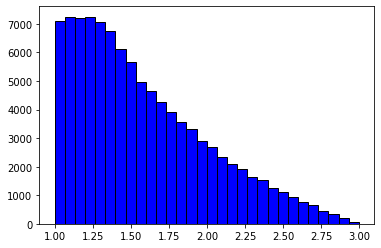

In [ ]:
plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

In [ ]:
np.random.seed(5)
n = 10000
a = 2
b = 10 

u = 3
sigma = 1

data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)

p_d = 1 + np.log(1 + (sigma/u)**2)

 
opt = u
revenue=0
for i in rej_sample:
  revenue += auction_exp(data_uniform,i)

exp_revenue = revenue/len(rej_sample)

APX = opt/exp_revenue
print('worst case robust APX upper bound = ' + str(p_d))
print('Uniform distribution APX = ' + str(APX))


worst case robust APX upper bound = 1.1053605156578263
Uniform distribution APX = 1.4096148418873307


In [ ]:
exp_revenue


2.121527270494244

### Stacking tranformations

We want to stack normalizing flow transformations. From the stacked tranformations, we want to be able to evaluate densities (slide 27: Reverse transformation) and/or sample points (slide 31: Forward transformation).

#### Task 4: stacking tranformations - log_prob (20 pt)
Implement the method log_prob in class StackedFlows. This method should compute tthe log density for each sample.


#### Task 5: stacking tranformations - rsample (20 pt)
Implement the method rsample in class StackedFlows. This method should sample from the transforamed distribution and compute its log density.


In [ ]:
a = nn.Parameter(torch.Tensor([-10.1,0.1,-1]))
b = torch.abs(a)

#b = [d.sample() for _ in range(5)]
print(b)

tensor([10.1000,  0.1000,  1.0000], grad_fn=<AbsBackward>)


In [ ]:
class StackedFlows(nn.Module):
    def __init__(self, transforms, dim=2, base_dist='Normal'):
        """Stack a list of tranformations with a given based distribtuion.

        Args:
            tranforms: list fo stacked tranformations. list of Flows
            dim: dimension of input/output data. int
            base_dist: name of the base distribution. options: ['Normal']
        """
        super().__init__()
        if isinstance(transforms, Flow):
            self.transforms = nn.ModuleList([transforms, ])
        elif isinstance(transforms, list):
            if not all(isinstance(t, Flow) for t in transforms):
                raise ValueError("transforms must be a Flow or a list of Flows")
            self.transforms = nn.ModuleList(transforms)
        else:
            raise ValueError(f"transforms must a Flow or a list, but was {type(transforms)}")
        self.dim = dim
        if base_dist == "Normal":
            self.base_dist = MultivariateNormal(torch.zeros(self.dim).to(device), torch.eye(self.dim).to(device))
        else:
            raise NotImplementedError

    def log_prob(self, x):
        """Compute log probability of a batch of data (slide 27).

        Args:
            x: input sample. shape [batch_size, dim]

        Returns:
            log_prob: Log probability of the data, shape [batch_size]
        """
        ##########################################################
        # YOUR CODE HERE
        #the log(p0(z0))
        log_prob =  torch.zeros(x.shape[0]) 
        z = x
       
        for t in self.transforms:
             
          z, inv_log_det_jac = t.inverse(z)
          log_prob = log_prob + inv_log_det_jac
            
        log_prob = log_prob + self.base_dist.log_prob(z)

       ##########################################################
        return log_prob

    def rsample(self, batch_size):
        """Sample from the transformed distribution (slide 31).

        Returns:
            x: sample after forward tranformation, shape [batch_size, dim]
            log_prob: Log probability of x, shape [batch_size]
        """
        ##########################################################
        # YOUR CODE HERE
        #generate batch size samples from base distribution
        z = self.base_dist.sample_n(batch_size)
        log_prob = self.base_dist.log_prob(z)
        for t in self.transforms:
          z , log_det_jac= t.forward(z)
          log_prob = log_prob + 1/log_det_jac
        
        x = z  
        
        ##########################################################
        return x, log_prob

# 2. Maximum-likelihood training

We train normalizing flows by maximizing the likelihood (Slide 28) of the data $x^{(i)}$ w.r.t. the flow parameters $\phi$ i.e.:

$$\max_\phi \frac{1}{|\mathcal{D}|} \sum_{x^{(i)} \in \mathcal{D}} log p(x^{(i)})$$

#### Task 6: training - max-likelihood (10 pt)
Complete the functions train such that it trains the model with maximum-likelihood. 

The variable loss should be a scalar equal to the the mean loss for the data in the current batch. Note that here we expect to minimize the negaitve log-likelihood instead of maximizing the log-likelihood.


In [ ]:
def train(model, dataset, batch_size=100, max_epochs=1000, frequency=250):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    # Load dataset
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)
    
    # Train model
    losses = []
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)
    for epoch in range(max_epochs + 1):
        total_loss = 0
        for batch_index, (X_train) in enumerate(train_loader):
            ##########################################################
            # YOUR CODE HERE
            
            loss  = - torch.sum(model.log_prob(X_train))/X_train.shape[0]
           
           
            ##########################################################
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss      
        total_loss /= len(train_loader)
        losses.append(total_loss)
        
        if epoch % frequency == 0:
            print(f"Epoch {epoch} -> loss: {total_loss.item():.2f}")
            plot_density(model, train_loader, device=device)
    
    return model, losses

# 3. Results

In this section we use three 2D datasets:
- A single Gaussian with non-zero mean
- Three gaussians
- Two moons

For each dataset, we train an affine and a radial transformation with a Gaussian base distribution. The affine tranformation should only be able to scale and shift the base distribution. The radial tranformation is capable of more complex transformations.

Plots show:
- Evolution of density estimation during training.
- The loss curve during training. 
- The density learned by the model after training.
- Samples from the model after training (if possible).

If it learns corretly, the density estimation significantly changes after 100 epochs already for each toy dataset.

## Dataset 1: shifted Gaussian
The first dataset composed of one Gaussian with a non zero mean. All flows should manage to fit this density.

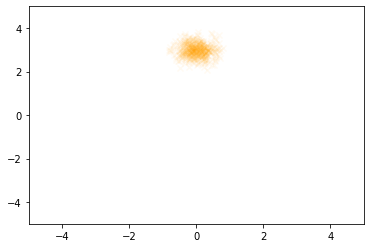

In [ ]:
dataset_1 = CircleGaussiansDataset(n_gaussians=1, n_samples=500)
plt.scatter(dataset_1.X[:,0], dataset_1.X[:,1], alpha=.05, marker='x', c='orange')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

### Affine flow 

Epoch 0 -> loss: 634.35


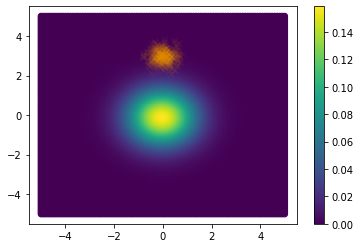

Epoch 250 -> loss: 246.12


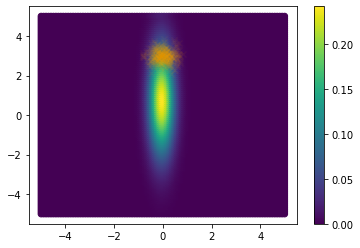

Epoch 500 -> loss: 204.21


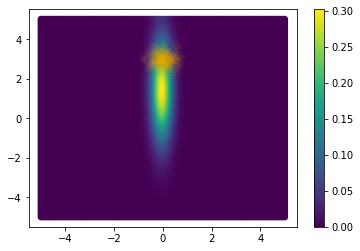

Epoch 750 -> loss: 118.39


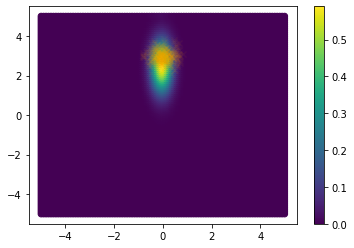

Epoch 1000 -> loss: 41.69


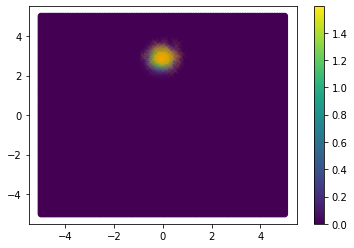

Epoch 1250 -> loss: 40.32


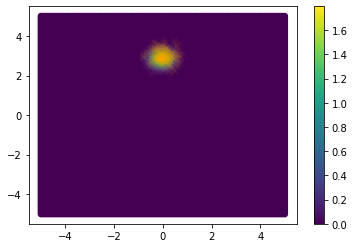

Epoch 1500 -> loss: 40.32


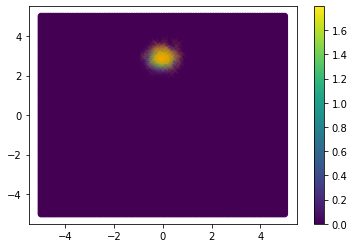

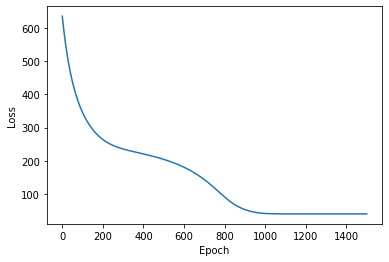

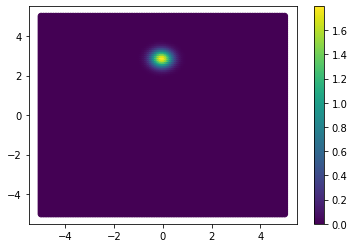

/usr/local/lib/python3.6/dist-packages/torch/distributions/distribution.py:134: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


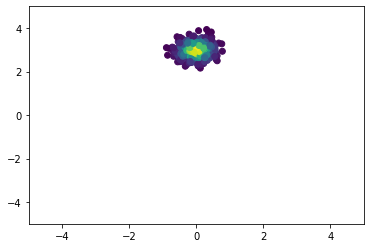

In [ ]:
transforms = [Affine().to(device)]
model = StackedFlows(transforms, base_dist='Normal').to(device)
model, losses = train(model, dataset_1, max_epochs=1500)

# Plots
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plot_density(model, [], device=device)
plot_samples(model)

### Radial flow (4 layers)

Epoch 0 -> loss: 5.25


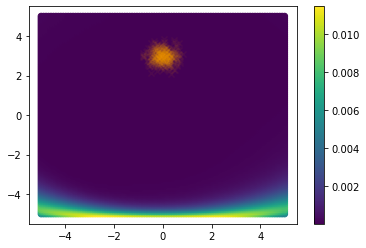

Epoch 250 -> loss: 10.17


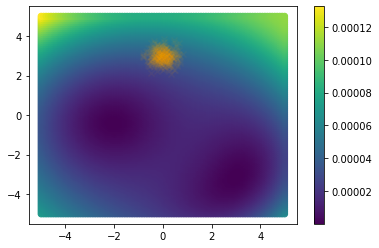

Epoch 500 -> loss: 8.76


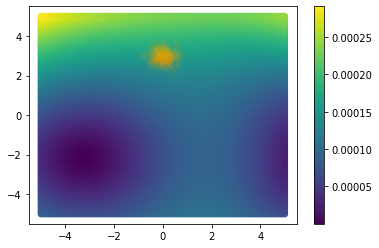

Epoch 750 -> loss: 7.94


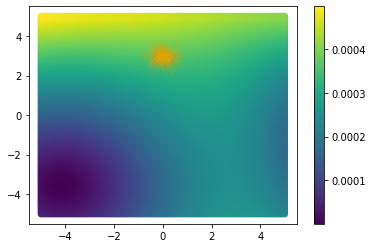

Epoch 1000 -> loss: 7.38


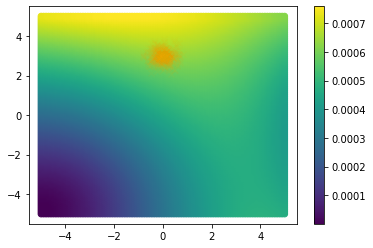

Epoch 1250 -> loss: 6.97


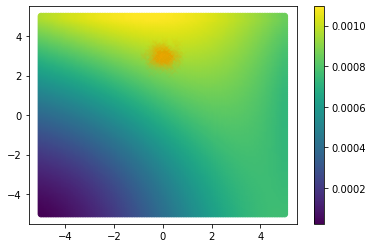

Epoch 1500 -> loss: 6.64


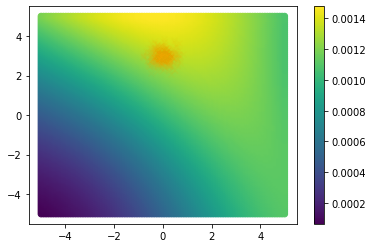

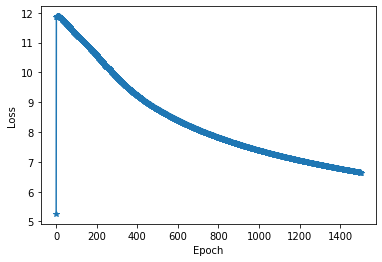

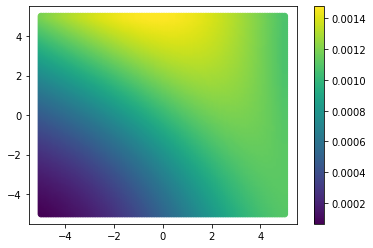

In [ ]:
transforms = [InverseFlow(Radial()).to(device) for _ in range(4)]
model = StackedFlows(transforms, base_dist='Normal').to(device)
model, losses = train(model, dataset_1, max_epochs=1500)

# Plots
plt.plot(losses, marker='*')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plot_density(model, [], device=device)

## Dataset 2: 3 Gaussians
The second dataset is composed of 3 gaussians with means on a circle.

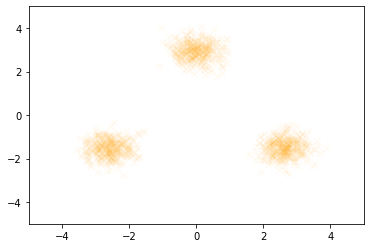

In [ ]:
dataset_2 = CircleGaussiansDataset(n_gaussians=3, n_samples=400, variance=.4)
plt.scatter(dataset_2.X[:,0], dataset_2.X[:,1], alpha=.05, marker='x', c='orange')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

### Affine flow

Epoch 0 -> loss: 644.74


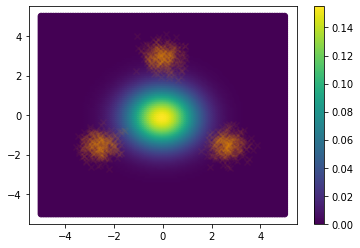

Epoch 250 -> loss: 437.43


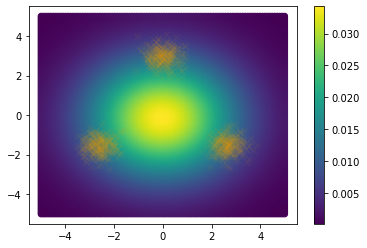

Epoch 500 -> loss: 437.43


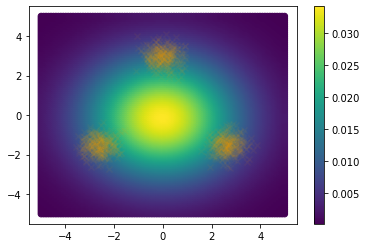

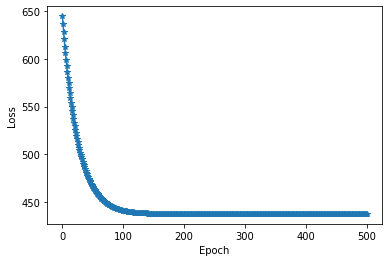

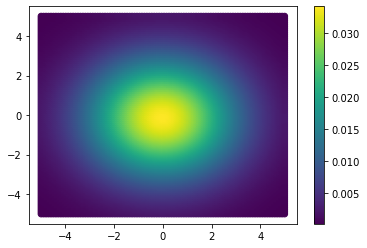

/usr/local/lib/python3.6/dist-packages/torch/distributions/distribution.py:134: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


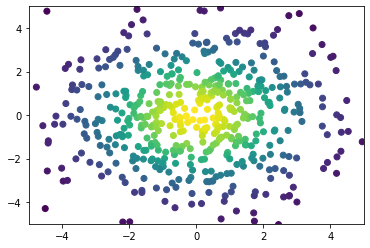

In [ ]:
transforms = [Affine().to(device)]
model = StackedFlows(transforms, base_dist='Normal').to(device)
model, losses = train(model, dataset_2, max_epochs=500)

# Plots
plt.plot(losses, marker='*')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plot_density(model, [], device=device)
plot_samples(model)

Affine flow should fail here.

### Radial flow (32 layers)

Epoch 0 -> loss: 5466.19


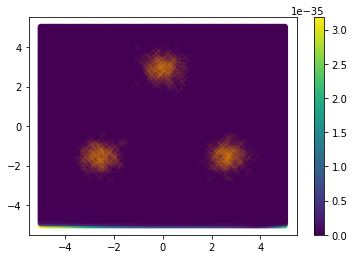

Epoch 100 -> loss: 7987.05


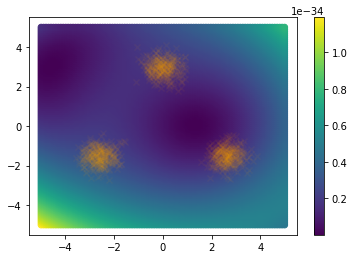

Epoch 200 -> loss: 6723.12


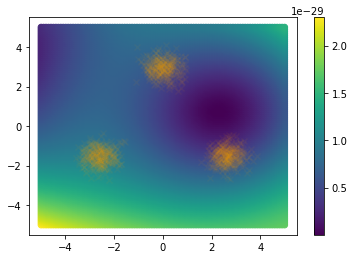

Epoch 300 -> loss: 5894.93


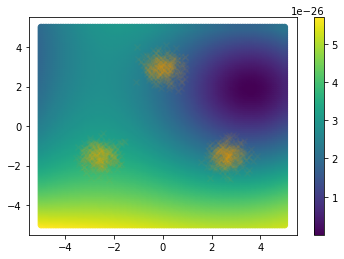

Epoch 400 -> loss: 5288.20


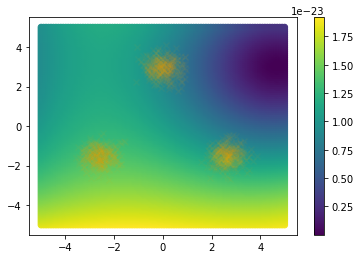

Epoch 500 -> loss: 4827.99


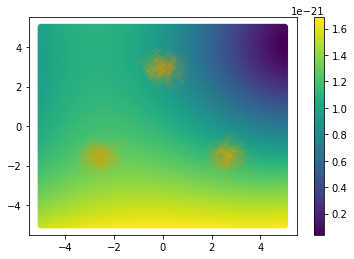

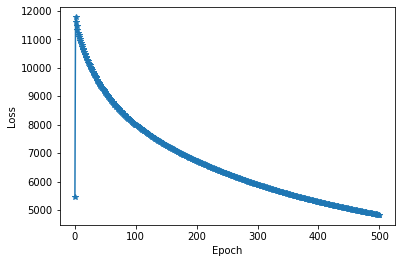

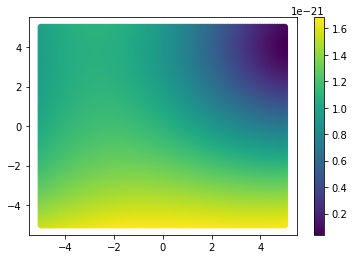

In [ ]:
transforms = [InverseFlow(Radial()).to(device) for _ in range(32)]
model = StackedFlows(transforms, base_dist='Normal').to(device)
model, losses = train(model, dataset_2, max_epochs=500, frequency=100)

# Plots
plt.plot(losses, marker='*')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plot_density(model, [], device=device)

Using 32 layers of radial flow should lead to a good reasonable fit of the data after 500 epochs. Traning with more layers and for more epochs would improve the density estimation but would take more time. You might have to run the training multiple times to learn the three Gaussians (it learns sometimes only two Gaussians).

## Dataset 3: 2 Moons

The third dataset is composed of 2 moons. Affine flow should fail again. With more layers, Radial flow should work. 

In [ ]:
dataset_3 = MoonsDataset()
plt.scatter(dataset_3.X[:,0], dataset_3.X[:,1], alpha=.05, marker='x', c='orange')
plt.xlim(-2.5, 3)
plt.ylim(-2.5, 3)
plt.show()

### Affine flow 

In [ ]:
transforms = [Affine().to(device)]
model = StackedFlows(transforms, base_dist='Normal').to(device)
model, losses = train(model, dataset_3, max_epochs=500)

# Plots
plt.plot(losses, marker='*')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plot_density(model, [], device=device)
plot_samples(model)

Affine flow should fail here.

### Radial flow (32 layers)

In [ ]:
transforms = [InverseFlow(Radial()).to(device) for _ in range(32)]
model = StackedFlows(transforms, base_dist='Normal').to(device)
model, losses = train(model, dataset_3, max_epochs=500, frequency=100)

# Plots
plt.plot(losses, marker='*')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plot_density(model, [], mesh_size=3, device=device)

Using 32 layers of radial flow should lead to a good reasonable fit of the data after 500 epochs. Traning with more layers and for more epochs would improve the density estimation but would take more time.